Khai báo các module sử dụng

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Flatten,MaxPooling2D,AveragePooling2D,Conv1D,AveragePooling1D
import tensorflow as tf
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


load dữ liệu

In [ ]:
data =  pd.read_csv('/content/gdrive/MyDrive/deeplearning/voice.csv')


visualization data

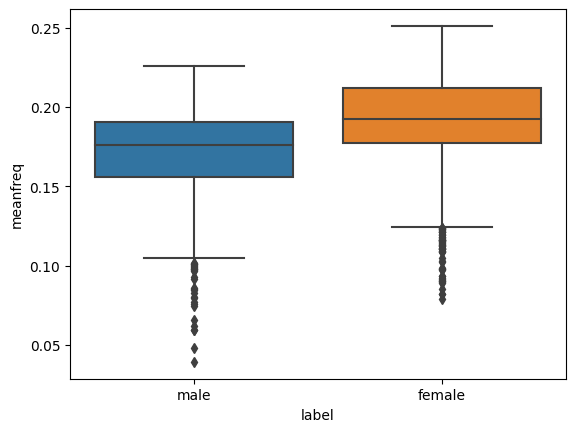

In [ ]:
sns.boxplot(x="label",y="meanfreq",data=data)
plt.show()

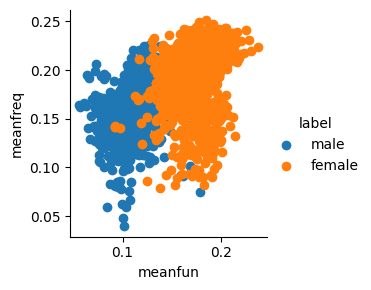

In [ ]:
sns.FacetGrid(data, hue="label")\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


AttributeError: ignored

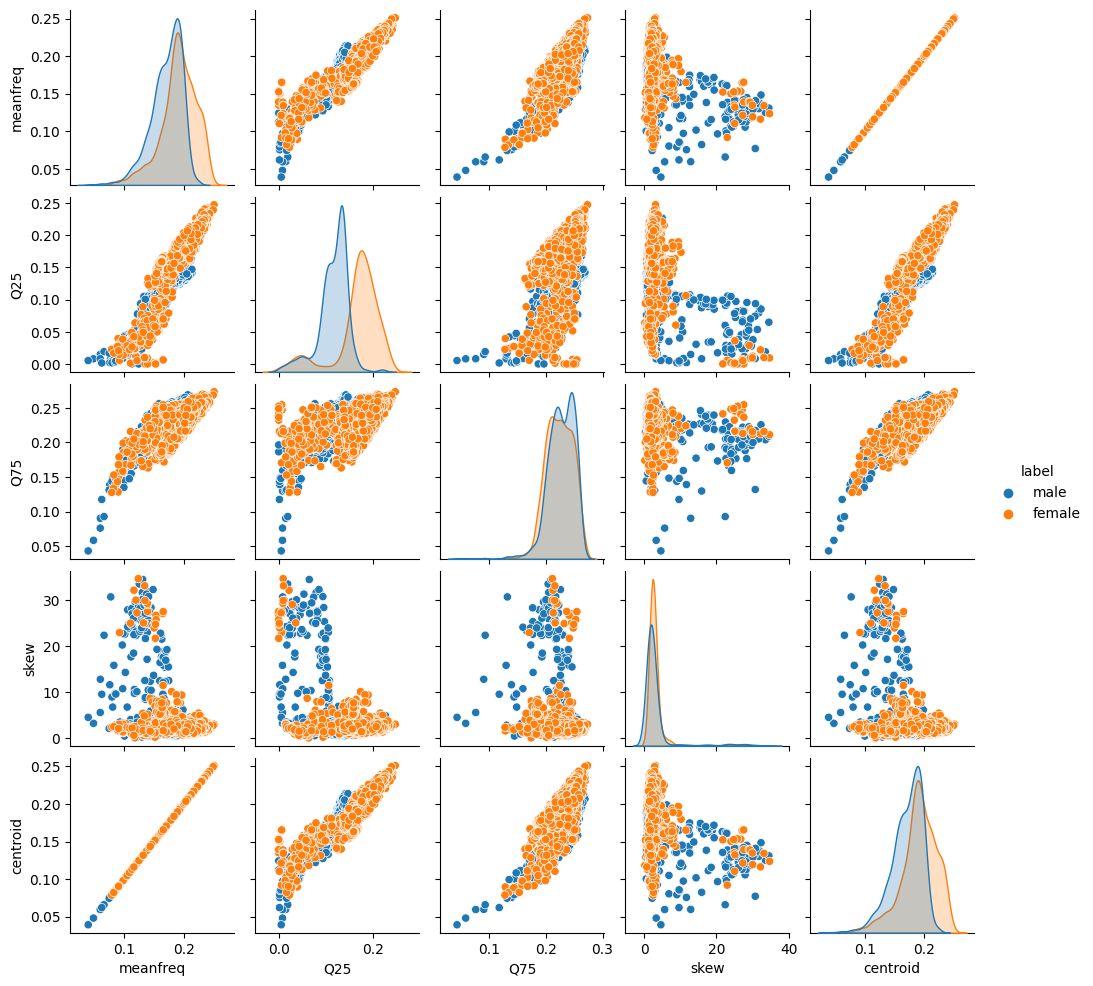

In [ ]:
sns.pairplot(data[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']],
                 hue='label', size=2)
sns.plt.show()

In [ ]:
dataa= np.array(data["meanfreq"])
np.max(dataa)

0.251123758720282

In [ ]:
wide_df = px.data.medals_wide()
wide_fig = px.bar(data,
    x="label",
    y="meanfreq",
    barmode = 'group') #Barmode attribute
wide_fig.show()

xử lý dữ liệu: mã hóa label và chuẩn hóa dữ liệu

In [ ]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
y = data['label'].copy()
X = data.drop('label', axis=1).copy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,-1.638842,1.658182,-0.877839,-1.873163,-0.999378,1.579141,-0.325020,-0.221916,1.507749,1.999883,0.460602,-1.638842,1.237885,2.444087,0.114817,0.007024,-0.708404,-0.237556,-0.224892,-0.098989
3164,-2.162452,1.927682,-2.994482,-2.008095,-0.840021,1.820721,-0.577009,-0.252503,1.458418,1.697831,-1.963949,-2.162452,1.429532,-0.124536,0.565959,0.153573,-0.214641,-0.388453,-0.384717,0.871981
3165,-1.298773,2.322724,-0.051973,-2.199039,-0.017123,2.492666,-0.298044,-0.222108,1.150198,1.385857,-2.037497,-1.298773,2.077781,0.140728,0.565959,-0.637833,-0.708404,-0.599266,-0.586717,0.175887
3166,-1.245202,2.012196,-0.017728,-1.991852,-0.204021,2.153653,-0.365367,-0.231123,1.229850,1.505711,0.607848,-1.245202,0.915445,-0.120678,-0.294030,-0.072080,-0.708404,-0.412863,-0.400255,1.149161


In [ ]:
#X = X.reshape(-1,5,5)
X= np.expand_dims(X,axis = 2)
X.shape

(3168, 20, 1)

Phân chia tập dữ liệu thành các tập train, test, valid

In [ ]:
def split_data(x_data, y_data, test_size=0.2, valid_size=0.2):
    # split training set and testing set
    X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,
                                          test_size=test_size, random_state=7)
    # split training set and validation set
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                        test_size=valid_size, random_state=7)
    # return a dictionary of values
    return {
        "X_train": X_train,
        "X_valid": X_valid,
        "X_test": X_test,
        "y_train": y_train,
        "y_valid": y_valid,
        "y_test": y_test
    }
data = split_data(X, y, test_size=0.2, valid_size=0.2)

xây dựng model CNN theo kiến trúc LeNet-5

In [ ]:
#model = Sequential()
#model.add(Conv1D(filters = 16, kernel_size = 2, activation='relu', input_shape=(20,1)))
#model.add(AveragePooling1D())
#model.add(Conv1D(filters = 32, kernel_size = 2, activation='relu'))
#model.add(AveragePooling1D())
#model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1, activation = 'sigmoid'))
#model.compile( loss='binary_crossentropy', metrics=[ 'accuracy'],optimizer='adam')
#model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 19, 64)            192       
                                                                 
 average_pooling1d_5 (Averag  (None, 9, 64)            0         
 ePooling1D)                                                     
                                                                 
 flatten_5 (Flatten)         (None, 576)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                36928     
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                      

xây dựng model đề xuất

In [3]:
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 2, activation='relu', input_shape=(20,1)))
model.add(AveragePooling1D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile( loss='binary_crossentropy', metrics=[ 'accuracy'],optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 32)            96        
                                                                 
 average_pooling1d (AverageP  (None, 9, 32)            0         
 ooling1D)                                                       
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 64)                18496     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                        

training model

In [ ]:
tensorboard = TensorBoard(log_dir="logs")
batch_size = 32
epochs = 100
# train the model using the training set and validating using validation set
history = model.fit(data["X_train"], data["y_train"], epochs=epochs, batch_size=batch_size, validation_data=(data["X_valid"], data["y_valid"]),
          callbacks=[tensorboard])

Epoch 1/100
64/64 [==============================] - 1s 8ms/step - loss: 0.2123 - accuracy: 0.9196 - val_loss: 0.0874 - val_accuracy: 0.9744
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 0.1069 - accuracy: 0.9679 - val_loss: 0.0945 - val_accuracy: 0.9704
Epoch 3/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0946 - accuracy: 0.9704 - val_loss: 0.1144 - val_accuracy: 0.9645
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0872 - accuracy: 0.9714 - val_loss: 0.0916 - val_accuracy: 0.9744
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0822 - accuracy: 0.9753 - val_loss: 0.0938 - val_accuracy: 0.9724
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0806 - accuracy: 0.9729 - val_loss: 0.0989 - val_accuracy: 0.9645
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0794 - accuracy: 0.9758 - val_loss: 0.0835 - val_accuracy: 0.9724
Epoch 8/100
6

đánh giá kết quả model qua tập test

In [ ]:
print(f"Evaluating the model using {len(data['X_test'])} samples...")
Loss, Accuracy = model.evaluate(data["X_test"], data["y_test"])
print(f"Loss: {Loss:.4f}")
print(f"Accuracy: {Accuracy*100:.2f}%")

Evaluating the model using 317 samples...
10/10 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.9748
Loss: 0.1356
Accuracy: 97.48%


Vẽ đường đặc tính của accuracy và loss trong quá trình train

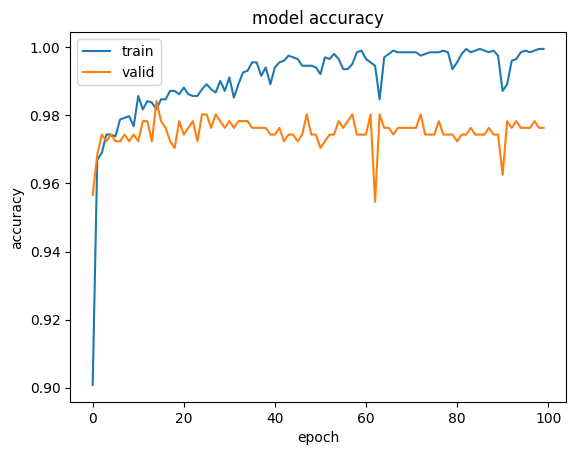

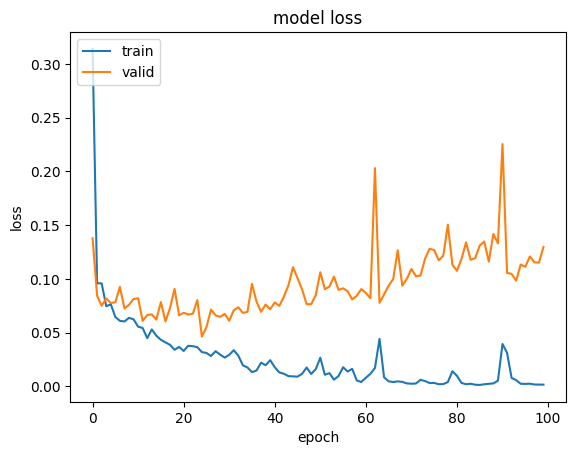

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

load tập dữ liệu tự tạo

In [ ]:
data_test =  pd.read_csv('/content/gdrive/MyDrive/deeplearning/O2_voice.csv')
data_test

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.160166,0.059639,0.158566,0.108387,0.211756,0.103369,2.984328,13.908546,0.874481,0.414072,...,0.160166,0.092536,0.031809,0.111111,0.242188,0.093750,0.445312,0.351562,0.500000,male
1,0.159824,0.058212,0.164588,0.107384,0.212760,0.105376,3.291274,14.891648,0.850610,0.369003,...,0.159824,0.101013,0.090395,0.108844,0.177734,0.093750,0.328125,0.234375,0.533333,male
2,0.164051,0.059817,0.171613,0.107384,0.211756,0.104373,2.766462,12.208298,0.889727,0.455283,...,0.164051,0.094798,0.045714,0.115942,0.242188,0.085938,0.437500,0.351562,0.466667,male
3,0.162562,0.060721,0.165591,0.108387,0.213763,0.105376,2.756016,11.751290,0.901484,0.532240,...,0.162562,0.099749,0.025974,0.144144,0.179688,0.109375,0.312500,0.203125,0.519231,male
4,0.156273,0.058692,0.123441,0.107384,0.211756,0.104373,3.022070,12.902121,0.822224,0.318487,...,0.156273,0.119876,0.102564,0.202532,0.238281,0.101562,0.437500,0.335938,0.488372,male
5,0.188281,0.060989,0.210753,0.124444,0.235842,0.111398,1.265168,3.772055,0.910515,0.482185,...,0.188281,0.118497,0.034261,0.170213,0.373047,0.148438,0.593750,0.445312,0.649123,male
6,0.202394,0.065781,0.210753,0.170609,0.267957,0.097348,2.318271,9.158429,0.885287,0.420641,...,0.202394,0.105061,0.089385,0.131148,0.302734,0.210938,0.476562,0.265625,0.382353,male
7,0.191001,0.072840,0.205735,0.108387,0.264946,0.156559,1.926238,7.049951,0.895440,0.471850,...,0.191001,0.109218,0.026578,0.219178,0.465625,0.117188,1.117188,1.000000,0.523438,male
8,0.184150,0.044993,0.184659,0.165591,0.201720,0.036129,1.934367,5.890263,0.884895,0.413437,...,0.184150,0.124647,0.027211,0.195122,0.394531,0.195312,0.578125,0.382812,0.612245,female
9,0.178647,0.047622,0.179642,0.157563,0.199713,0.042151,2.545897,10.027766,0.895693,0.474538,...,0.178647,0.106397,0.018328,0.210526,0.292969,0.179688,0.601562,0.421875,0.654321,female


tiền xử lý tập dữ liệu tự tạo

In [ ]:
y_data_test = data_test['label'].copy()
X_data_test = data_test.drop('label', axis=1).copy()
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_data_test)
pd.DataFrame(X_data_test)
X_data_test.shape

(16, 20)

In [ ]:
X_data_test= np.expand_dims(X_data_test,axis = 2)
X_data_test.shape

(16, 20, 1)

dùng model để dự đoán kết quả trên tập dữ liệu tự tạo

In [ ]:
i = int(input("nhap so thu tu nguoi can du doan trong khoang [0,15]"))
test = X_data_test[i].reshape(1,20,1)
male_prob = model.predict(test)[0][0]
female_prob = 1 - male_prob
gender = "male" if male_prob > female_prob else "female"
# show the result!
print("Result_predict:", gender)
print(f"Probabilities::: Male: {male_prob*100:.2f}%    Female: {female_prob*100:.2f}%")
print("Result_original:",y[i])

nhap so thu tu nguoi can du doan trong khoang [0,15]11
1/1 [==============================] - 0s 23ms/step
Result_predict: female
Probabilities::: Male: 0.14%    Female: 99.86%
Result_original: female


đánh giá kết quả model trên tập dữ liệu tự tạo

In [ ]:
label_encoder = LabelEncoder()
data_test['label'] = label_encoder.fit_transform(data_test['label'])
y_data_test = data_test['label'].copy()
X_data_test = data_test.drop('label', axis=1).copy()
scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_data_test)
X_data_test= np.expand_dims(X_data_test,axis = 2)
X_data_test.shape

(16, 20, 1)

In [ ]:
print(f"Evaluating the model using {len(X_data_test)} samples...")
Loss, Accuracy = model.evaluate(X_data_test, y_data_test)
print(f"Loss: {Loss:.4f}")
print(f"Accuracy: {Accuracy*100:.2f}%")

Evaluating the model using 16 samples...
1/1 [==============================] - 0s 28ms/step - loss: 8.8486e-05 - accuracy: 1.0000
Loss: 0.0001
Accuracy: 100.00%
